# Geog 573 (675) Advanced Geocomputing and Geospatial Big Data Analytics
### Meiliu Wu (mwu233@wisc.edu)
### Lab3: Vector Computation and Spatial Clustering

#### Lab 3 Tasks & hand-in
•	Please collect your answers in a single .ipynb or .py file called lab3_yourname.ipynb or lab3_yourname.py <br>
•	Submit all the code and data files to the assignment folder called “Lab 3”. Notice that if you are using exisiting GIS shapefile, you should upload all the associated files with the same name not just the .shp file.<br>
•	Include appropriate comments to explain what each line or block of code accomplishes. You must comment your code for full credit. <br>

Question (1) Finish your code for computing the area, the centriod, and the minimum bounding envelop of a simple polygon.  <br>
Question (2) In lab2, you created python scripts to collect 1000 geotagged tweets based on your interested hashtags/keywords and the geographic region using the Twitter Search API, save the data in the JSON format. In this lab, you need to incoprate a self-defined area unit (i.e., a polygon) using WKT or GeoJSON format or an exisiting geographic boundnary "Shapefile" in GIS format to spatially extract those geotagged tweets within this polygon and save them as a point set.<br>
Question (3) Perform the K-means and the DBSCAN spatial clustering analysis on your geotagged tweets (i.e., the point set extracted from the question 2); comment on your identified patterns. 

#### Due Date: Two weeks later (March. 14, 2019)

## Q1 Geometric Computation

#### How to caculate the area of a polygon 
https://www.wikihow.com/Calculate-the-Area-of-a-Polygon

In [1]:
import sys
import os
import math
import json

class Point:
    def __init__(self,x,y):
        self.lon = x
        self.lat = y
        
class Polyline:
    def __init__(self, points = []):
        self.points = points
        
    def getLength(self): # Euclidean distance
        Length = 0.0
        for i in range(len(self.points)-1):
            Length += math.sqrt((self.points[i+1].lon-self.points[i].lon)**2 +(self.points[i+1].lat-self.points[i].lat)**2)
        return Length

class Polygon:
    def __init__(self, points = []):
        self.points = points
        
    def getArea(self): 
        # Implement the method here
        print("caculate the area of a polygon")
        area = 0.0
        for i in range(len(self.points)): # this can be both clockwise and anticlockwise order of points
            if i == len(self.points)-1:
                area += (self.points[i].lon*self.points[0].lat) - (self.points[0].lon*self.points[i].lat)
            else:
                area += (self.points[i].lon*self.points[i+1].lat) - (self.points[i+1].lon*self.points[i].lat)
        area = abs(area) * 0.5 
        return area
    
    def getCentroid(self):
        # Implement the method here
        print("get the centroid of a polygon")
        x = 0.0
        y = 0.0
        area = self.getArea()
        for i in range(len(self.points)):
            if i == len(self.points)-1: 
                x += (self.points[i].lon+self.points[0].lon)*((self.points[i].lon*self.points[0].lat) - (self.points[0].lon*self.points[i].lat))
                y += (self.points[i].lat+self.points[0].lat)*((self.points[i].lon*self.points[0].lat) - (self.points[0].lon*self.points[i].lat))
            else:
                x += (self.points[i].lon+self.points[i+1].lon)*((self.points[i].lon*self.points[i+1].lat) - (self.points[i+1].lon*self.points[i].lat))
                y += (self.points[i].lat+self.points[i+1].lat)*((self.points[i].lon*self.points[i+1].lat) - (self.points[i+1].lon*self.points[i].lat))
        x = x / (6*area)
        y = y / (6*area)
        return Point(x,y)
        
        
    def getEnvelop(self):
        # Implement the method here
        print("get the minumum bounding envelop of a polygon")
        xmin = float('inf') #lon
        ymin = float('inf') #lat
        xmax = -float('inf') #lon
        ymax = -float('inf') #lat
        
        for i in range(len(self.points)):
            if self.points[i].lon > xmax:
                xmax = self.points[i].lon
            if self.points[i].lon < xmin:
                xmin = self.points[i].lon
                
            if self.points[i].lat > ymax:
                ymax = self.points[i].lat
            if self.points[i].lat < ymin:
                ymin = self.points[i].lat
        
        
        p1 = Point(xmin,ymin)
        p2 = Point(xmax,ymin)
        p3 = Point(xmax,ymax)
        p4 = Point(xmin,ymax)
        
        return Polygon([p1,p2,p3,p4]) # anticlockwise order of points

if __name__ == "__main__":
    
    # test #1
    pointA=Point(1, 0)
    pointB=Point(2, 1)
    pointC=Point(1, 2)
    pointD=Point(0, 1)
    
    poly1 = Polygon([pointA,pointB,pointC,pointD])
    a = poly1.getArea()
    print ("    Area: ", a, '\n')
    
    c = poly1.getCentroid()
    print ("    Centroid: (", c.lon, ',', c.lat, ')\n')
    
    e = poly1.getEnvelop()
    for i in range(len(e.points)):
        print ('    Envelop points #',i,'(',e.points[i].lon,',',e.points[i].lat,')')
        
    print ('\n\n')
        
     # test #2
    pointA=Point(1, 0)
    pointB=Point(2, 0)
    pointC=Point(2, 2)
    pointD=Point(1, 2)
    pointE=Point(0, 3)
    pointF=Point(-1, 2)
    
    poly2 = Polygon([pointA,pointB,pointC,pointD,pointE,pointF])
    a = poly2.getArea()
    print ("    Area: ", a, '\n')
    
    c = poly2.getCentroid()
    print ("    Centroid: (", c.lon, ',', c.lat, ')\n')
    
    e = poly2.getEnvelop()
    for i in range(len(e.points)):
        print ('    Envelop points #',i,'(',e.points[i].lon,',',e.points[i].lat,')')
    


caculate the area of a polygon
    Area:  2.0 

get the centroid of a polygon
caculate the area of a polygon
    Centroid: ( 1.0 , 1.0 )

get the minumum bounding envelop of a polygon
    Envelop points # 0 ( 0 , 0 )
    Envelop points # 1 ( 2 , 0 )
    Envelop points # 2 ( 2 , 2 )
    Envelop points # 3 ( 0 , 2 )



caculate the area of a polygon
    Area:  5.0 

get the centroid of a polygon
caculate the area of a polygon
    Centroid: ( 0.7333333333333333 , 1.4 )

get the minumum bounding envelop of a polygon
    Envelop points # 0 ( -1 , 0 )
    Envelop points # 1 ( 2 , 0 )
    Envelop points # 2 ( 2 , 3 )
    Envelop points # 3 ( -1 , 3 )


### Minimum Bounding Geometry
URL: https://pro.arcgis.com/en/pro-app/tool-reference/data-management/minimum-bounding-geometry.htm

## Q2 Point within Polygon Check

#### Well-know-text (WKT) representation of geometry
https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry <br>

#### Another vector processing package: Shapely in addition to GDAL/OGR, ArcPy
https://github.com/Toblerity/Shapely

<b>Shapely</b> <br>
Shapely does manipulating and analyzing data. It’d based on GEOS, the standard library for doing that kind of thing, that is very fast. With Shapely, you can do things like buffers, unions, intersections, centroids, convex hulls, and lots more. It does it all quite efficiently.

<b>Fiona</b> <br>
Fiona does reading and writing data formats. For this it uses OGR, the most popular open-source geo-conversion system. 
https://github.com/Toblerity/Fiona

## Read Shapefiles
(1) Read your shapefile with Fiona, OSGeo/OGR or any Python package using the geo_interface protocol (GeoJSON):

In [2]:
# data source of cb_2017_us_nation_20m.shp: https://www.census.gov/geo/maps-data/data/cbf/cbf_nation.html
# check projection
import arcpy
import os

# Set environment settings
arcpy.env.overwriteOutput = True

# input data is in NAD 1983 UTM Zone 11N coordinate system
input_features = r"cb_2017_us_nation_20m.shp"

from osgeo import ogr
infile = ogr.Open(input_features)
layer = infile.GetLayer()
# crs
spatialRef = layer.GetSpatialRef()
spatialRef.ExportToWkt()

'GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]]'

In [4]:
# data source of cb_2017_us_nation_20m.shp: https://www.census.gov/geo/maps-data/data/cbf/cbf_nation.html
# transform the projection of cb_2017_us_nation_20m.shp from NAD83 to WGS84, in order to be consistent with geotweets crs

import arcpy
import os

# Set environment settings
arcpy.env.workspace = r'C:\Users\Meiliu\Documents\UW_Study_Work\2019Spring\Geog675\Labs\Lab3\Lab3_Meiliu_Wu' # change to the unzipped folder path
arcpy.env.overwriteOutput = True

# input data is in NAD 1983 UTM Zone 11N coordinate system
input_features = "cb_2017_us_nation_20m.shp"

# output data
output_feature_class = "cb_2017_us_nation_20m_pro.shp"

# create a spatial reference object for the output coordinate system
out_coordinate_system = arcpy.SpatialReference("WGS 1984")
in_coordinate_system = arcpy.SpatialReference("NAD 1983")
# run the tool
arcpy.Project_management(input_features, output_feature_class, out_coordinate_system,'NAD_1983_TO_WGS_1984_1',in_coordinate_system)
print('done')

done


In [5]:
# validate
from osgeo import ogr
infile = ogr.Open(output_feature_class)
layer = infile.GetLayer()
# crs
spatialRef = layer.GetSpatialRef()
spatialRef.ExportToWkt()

'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]]'

In [6]:
# using OGR
from osgeo import ogr
file = ogr.Open("cb_2017_us_nation_20m_pro.shp") # now the projection is wgs84 epsg:4326
shape = file.GetLayer(0)
#first feature of the shapefile
feature = shape.GetFeature(0)
first = feature.ExportToJson()
print (first) # (GeoJSON format)

{"type": "Feature", "geometry": {"type": "MultiPolygon", "coordinates": [[[[-136.563223, 58.03505199915337], [-136.538708, 58.0934819991542], [-136.446286, 58.11333999915449], [-136.365544, 58.14885399915502], [-136.387113, 58.25241399915652], [-136.290349, 58.25176099915651], [-136.176442, 58.265110999156704], [-136.033678, 58.2767279991569], [-135.877468, 58.25985199915666], [-135.78338, 58.28670899915703], [-135.712398, 58.231891999156225], [-135.497911, 58.16888199915531], [-135.275797, 58.09702399915425], [-135.108896, 58.088269999154114], [-134.950844, 58.036992999153384], [-134.926395, 57.92191899915171], [-135.004952, 57.88433799915118], [-134.94942955753, 57.781259288599315], [-134.939924, 57.76361199914945], [-134.824891, 57.50006699914574], [-134.825579, 57.37214299914397], [-134.854948, 57.26476599914249], [-134.738223, 56.97574099913857], [-134.695735, 56.90079099913757], [-134.663434, 56.80468699913629], [-134.62967, 56.70959599913503], [-134.615955, 56.637288999134086], 

(2) conversion to Shapely geometry (with the shape function)

In [7]:
print (type(first))

<class 'str'>


In [8]:
import ast
first = ast.literal_eval(first)

In [9]:
print (type(first))

<class 'dict'>


In [10]:
# now use the shape function of Shapely
from shapely.geometry import shape
shp_geom = shape(first["geometry"])
print (shp_geom)
# MULTIPOLYGON ()
print (type(shp_geom))
#<class 'shapely.geometry.multipolygon.MultiPolygon'>

MULTIPOLYGON (((-136.563223 58.03505199915337, -136.538708 58.0934819991542, -136.446286 58.11333999915449, -136.365544 58.14885399915502, -136.387113 58.25241399915652, -136.290349 58.25176099915651, -136.176442 58.2651109991567, -136.033678 58.2767279991569, -135.877468 58.25985199915666, -135.78338 58.28670899915703, -135.712398 58.23189199915623, -135.497911 58.16888199915531, -135.275797 58.09702399915425, -135.108896 58.08826999915411, -134.950844 58.03699299915338, -134.926395 57.92191899915171, -135.004952 57.88433799915118, -134.94942955753 57.78125928859932, -134.939924 57.76361199914945, -134.824891 57.50006699914574, -134.825579 57.37214299914397, -134.854948 57.26476599914249, -134.738223 56.97574099913857, -134.695735 56.90079099913757, -134.663434 56.80468699913629, -134.62967 56.70959599913503, -134.615955 56.63728899913409, -134.626943 56.55386799913302, -134.669778 56.52412899913261, -134.64177 56.44547899913162, -134.634828 56.34529699913034, -134.634668 56.265831999

(3) geo-computations (e.g., convexhull, buffer, joins, within, intersection, etc.)

# Reading JSON

In [11]:
import json
filename="geotweets_0311_CaptainMarvel_all.json" # geo: all over the world
#Read JSON data into the datastore variable
if filename:
    with open(filename, 'r') as f:
        datastore = json.load(f)
print(datastore)

[{'created_at': 'Mon Mar 11 19:28:15 +0000 2019', 'id': 1105188704660922369, 'id_str': '1105188704660922369', 'text': 'Before I saw Captain Marvel, I was listening to spicegirls &amp; officialrugrats movie soundtrack. Too Much is my favor… https://t.co/M7h4mF1Xqr', 'source': '<a href="http://instagram.com" rel="nofollow">Instagram</a>', 'truncated': True, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 932732000896798722, 'id_str': '932732000896798722', 'name': 'nickthemoviecritic', 'screen_name': 'nickthemoviecr1', 'location': 'Forney, TX', 'url': 'http://www.nickthemoviecritic.com', 'description': 'I’m a film critic who wants to help you on what’s good or bad about a particular movie.', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 75, 'friends_count': 1543, 'listed_count': 0, 'favourites_count': 44, 'statuses_count': 1

In [12]:
print(len(datastore))
print(type(datastore))
print(datastore[0]["coordinates"])

33
<class 'list'>
{'type': 'Point', 'coordinates': [-96.4597, 32.92]}


In [13]:
## draw WKT geometries 
from numpy import asarray
import pylab # python 3.x with newer version of matplotlib.pyplot
from shapely.geometry import Point, LineString, Polygon, mapping, shape
import json

pWithinUS = []
usBoundary = shp_geom

for p in datastore:
    
    pt = shape(json.loads(json.dumps(p["coordinates"])))
    
    if (pt.within(usBoundary)):
        pWithinUS.append(pt)
    
print(pWithinUS)
print(len(pWithinUS)) #12 points are within U.S, with total 33 points 
print(type(pWithinUS))

[<shapely.geometry.point.Point object at 0x000002181086C1D0>, <shapely.geometry.point.Point object at 0x000002181086C470>, <shapely.geometry.point.Point object at 0x000002181086C438>, <shapely.geometry.point.Point object at 0x000002180E8DB710>, <shapely.geometry.point.Point object at 0x000002180E8DB630>, <shapely.geometry.point.Point object at 0x000002181086C2E8>, <shapely.geometry.point.Point object at 0x000002181086C278>, <shapely.geometry.point.Point object at 0x0000021810821978>, <shapely.geometry.point.Point object at 0x00000218108210B8>, <shapely.geometry.point.Point object at 0x0000021810821D68>, <shapely.geometry.point.Point object at 0x0000021810821A58>, <shapely.geometry.point.Point object at 0x000002180EE7A320>]
12
<class 'list'>


In [14]:
print(pWithinUS[0].x,pWithinUS[0].y) # x is lon, y is lat
print(type(pWithinUS[0]))

-96.4597 32.92
<class 'shapely.geometry.point.Point'>


In [15]:
for i in range(len(pWithinUS)):
    print(pWithinUS[i].x,',',pWithinUS[i].y,)

-96.4597 , 32.92
-73.98368572 , 40.69101558
-157.799 , 21.4092
-95.54791 , 29.7162
-78.73495859 , 35.75819961
-74.4264369 , 41.43081591
-97.54341397 , 35.52538198
-97.763658 , 30.255772
-86.157072 , 39.768936
-87.6190333 , 41.8913991
-87.632496 , 41.883222
-87.64698352 , 41.90848663


## Q3 K-means clustering
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [16]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# import some data to play with
iris = datasets.load_iris()
print(iris.data)
print(type(iris.data))

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.2]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.6  1.4  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

In [17]:
a = np.array([])

for i in range(len(pWithinUS)):
    li = [pWithinUS[i].x,pWithinUS[i].y]
    a = np.concatenate((a, li))

print(a)

a = np.reshape(a, (-1, 2))
print(a)
print(type(a))

[ -96.4597       32.92        -73.98368572   40.69101558 -157.799        21.4092
  -95.54791      29.7162      -78.73495859   35.75819961  -74.4264369
   41.43081591  -97.54341397   35.52538198  -97.763658     30.255772
  -86.157072     39.768936    -87.6190333    41.8913991   -87.632496
   41.883222    -87.64698352   41.90848663]
[[ -96.4597       32.92      ]
 [ -73.98368572   40.69101558]
 [-157.799        21.4092    ]
 [ -95.54791      29.7162    ]
 [ -78.73495859   35.75819961]
 [ -74.4264369    41.43081591]
 [ -97.54341397   35.52538198]
 [ -97.763658     30.255772  ]
 [ -86.157072     39.768936  ]
 [ -87.6190333    41.8913991 ]
 [ -87.632496     41.883222  ]
 [ -87.64698352   41.90848663]]
<class 'numpy.ndarray'>


Index(['lon', 'lat'], dtype='object')
[3 0 1 3 0 0 3 3 2 2 2 2]


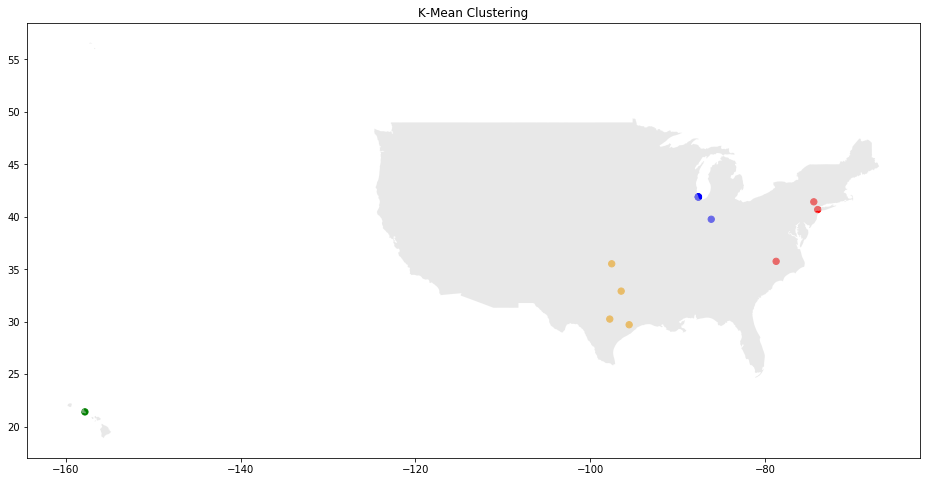

In [23]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from shapely.geometry import shape
import fiona
from osgeo import ogr

# Store the inputs as a Pandas Dataframe and set the column names
attributes = pd.DataFrame(a)
attributes.columns = ['lon','lat']
print(attributes.columns)

# Build the K-Means Clustering Model
# K Means Cluster
model = KMeans(n_clusters=4)
model.fit(attributes)
# This is the K-Means Clustering result
print(model.labels_)

#Visualise the classifier results
# Set the size of the plot
fig = plt.figure(figsize=(16,8))
# Create a colormap
colormap = np.array(['red', 'green', 'blue','orange'])
plt.scatter(attributes.lon, attributes.lat, c=colormap[model.labels_], s=40)
plt.title('K-Mean Clustering')

# plot shapefile
c = fiona.open('cb_2017_us_nation_20m_pro.shp')
pol = c[0]
geom = shape(pol['geometry'])

axs = fig.add_subplot(111)

for i in range(len(geom)):
    #exterior coordinates split into two arrays, xs and ys
    # which is how matplotlib will need for plotting
    
    if i in [78,6,7,8,9,10,12,13,14]: #only show the main U.S. continent
        xs, ys = geom[i].exterior.xy
        #plot it
        axs.fill(xs, ys, alpha=0.5, fc='lightgrey', ec='none')

# 1 is from hawaii - green >> itself is one cluster
# some points are so close to each other that they are overlapped (blue points)
# 4 orange points are in the mid, south areas
# 4 blue points are in the northeast areas
# 3 red points are in the east coast

## DBSCAN Clustering
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN

          lon        lat
0  -96.459700  32.920000
1  -73.983686  40.691016
2 -157.799000  21.409200
3  -95.547910  29.716200
4  -78.734959  35.758200
5  -74.426437  41.430816
6  -97.543414  35.525382
7  -97.763658  30.255772
8  -86.157072  39.768936
9  -87.619033  41.891399
[ 0  1 -1  0  1  1  0  0  2  2  2  2]


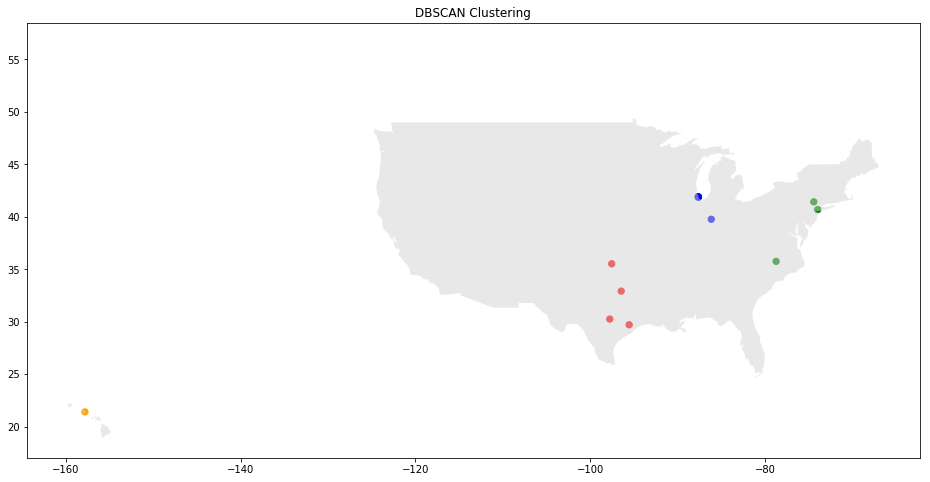

In [24]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from shapely.geometry import shape
import fiona

attributes = pd.DataFrame(a)
attributes.columns = ['lon','lat']
print(attributes.head(10)) # check the data

# Compute DBSCAN
model = DBSCAN(eps=7, min_samples=2) # I consider at least 2 points to be a cluster
db=model.fit(attributes)
print(db.labels_) #Cluster labels for each point in the dataset given to fit(). Noisy samples are given the label -1.

#Visualise the classifier results
# Set the size of the plot
fig=plt.figure(figsize=(16,8))
# Create a colormap
colormap = np.array(['red',"green",'blue','orange']) # more color choices https://matplotlib.org/examples/color/colormaps_reference.html
plt.scatter(attributes.lon, attributes.lat, c=colormap[db.labels_], s=40)
plt.title('DBSCAN Clustering')

# plot shapefile
c = fiona.open('cb_2017_us_nation_20m_pro.shp')
pol = c[0]
geom = shape(pol['geometry'])

axs = fig.add_subplot(111)

for i in range(len(geom)):
    #exterior coordinates split into two arrays, xs and ys
    # which is how matplotlib will need for plotting
    
    if i in [78,6,7,8,9,10,12,13,14]: #only show the main U.S. continent
        xs, ys = geom[i].exterior.xy
        #plot it
        axs.fill(xs, ys, alpha=0.5, fc='lightgrey', ec='none')

# 3 clusters - r,g,b. 
# 1 point is noisy from Hawaii - orange 

# some points are so close to each other that they are overlapped (blue points)
# 4 red points are in the mid, south areas
# 4 blue points are in the northeast areas
# 3 green points are in the east coast